In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
#plt.rcParams.update({‘figure.figsize’}) = (8, 6)
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 22})

In [88]:
scrape = pd.read_csv("SanFrancisco_jobs.csv")
scrape = scrape.append(pd.read_csv("Boston_jobs.csv"))
scrape = scrape.append(pd.read_csv("NewYork_jobs.csv"))
scrape = scrape.append(pd.read_csv("Austin_jobs.csv"))
scrape = scrape.append(pd.read_csv("Philadelphia_jobs.csv"))
scrape = scrape.append(pd.read_csv("Atlanta_jobs.csv"))
salary_data = scrape.append(pd.read_csv("Seattle_jobs.csv"))
salary_data["title"] = salary_data["title"]
salary_data

,Unnamed: 0,index,title,company,location,salary,summary,postdate,og_salary_period,6figs,in_city
0,0,ID2,Data Scientist,Parallel HR,San Mateo,200000,"MS/ PhD in fields like computer science, mathe...",Today,year,1,0
1,1,ID4,Application Security Engineer,Blue Owl,San Francisco,215000,Data Loss/Leakage Prevention. You can help us ...,Today,year,1,1
2,2,ID14,Data Science Analyst,Harnham US,San Francisco,107500,DATA SCIENCE ANALYST- CRM PLATFORM. They are l...,Sponsored by Harnham,year,1,1
3,3,ID19,Senior Software Engineer,Domino Data Lab,San Francisco,135000,Best-of-breed data science tools and platforms...,1 day ago,year,1,1
4,4,ID23,Software Engineer III,Walmart eCommerce,San Bruno,129000,Strong computer science fundamentals in algori...,1 day ago,year,1,0
5,5,ID24,Software Engineer III,Walmart,San Bruno,129000,Strong computer science fundamentals in algori...,1 day ago,year,1,0
6,6,ID28,"Senior Software Engineer, Analysis Platform",Quid,San Francisco,160500,Solid computer science foundation; Good unders...,1 day ago,year,1,1
7,7,ID40,Customer Success Specialist,Tesorio,Burlingame,43680,We plug into a company’s data sources about ca...,2 days ago,hour,0,0
8,8,ID41,Senior Data Science Engineer,Harnham US,San Francisco,170000,Senior Data Science Engineer. Understanding of...,Harnham,year,1,1
9,9,ID60,Embedded DSP Engineer - Audio and Acoustics Si...,EmbodyVR,San Mateo,100000,Collaborate with the EmbodyVR Data Science tea...,2 days ago,year,0,0


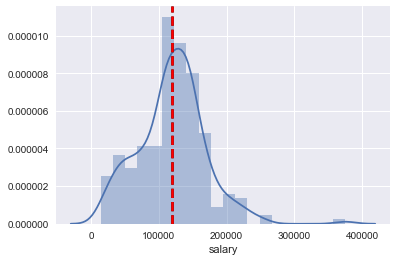

In [92]:
#plotting salary distribution, with vertical lines to represent the mean and median salary
sal_plot = salary_data[salary_data["salary"].notnull()]
ax = sns.distplot(sal_plot["salary"])
ax.axvline(sal_plot["salary"].median(), lw=2.5, ls='dashed', color='black')
ax.axvline(sal_plot["salary"].mean(), lw=2.5, ls='dashed', color='red')
#sns.plt.title('Indeed Salary Distribution with Median (black) and Mean (red)')

In [93]:
#splitting out our predictor variables from the salary data
sal_X = scrape.iloc[:, [2, 3, 4, 6, 8, 10]]
#sal_y will be above_6figs, creating as a dataframe
sal_y = pd.DataFrame(scrape["6figs"])

In [99]:
#Creating eight binary variables utilizing insights above to prepare data for logistic regression
#splitting out our predictor variables from the salary data
sal_X = salary_data[["location", "title", "company", "summary", "og_salary_period"]]
sal_X.reset_index(drop=True, inplace=True)
#sal_y will be above_6figs, creating as a dataframe, then converting to a 1-D array to allow for easier use below with k-folds, etc.
sal_y = pd.DataFrame(salary_data["6figs"])
sal_y = pd.DataFrame.as_matrix(sal_y).ravel()
#Creating variable for if job title includes "data scientist", combinations of "machine", "learning", "engineer", and "data"
sal_X["good_job_title"] = 0
sal_X.ix[(sal_X["title"].str.contains("Data Scientist") | 
            sal_X["title"].str.contains("Machine") | 
            sal_X["title"].str.contains("Learning") |
            sal_X["title"].str.contains("Engineer") |
            sal_X["title"].str.contains("Senior") |
            sal_X["title"].str.contains("Data")), "good_job_title"] = 1
# job_title terms like "research", "analyst" "associate" are all associated with below median income
sal_X["bad_job_title"] = 0
sal_X.ix[(sal_X["title"].str.contains("Research") | 
            sal_X["title"].str.contains("Analyst") | 
            sal_X["title"].str.contains("Analytics") | 
            sal_X["title"].str.contains("Associate")), "bad_job_title"] = 1
# working for *presumably* consulting firms e.g., "associates" is associated with above median salaries, while working for "university" is associated with below median salaries.
sal_X["good_company"] = 0
sal_X.ix[(sal_X["company"].str.contains("Associates") ), "good_company"] = 1
sal_X["bad_company"] = 0
sal_X.ix[(sal_X["company"].str.contains("University") ), "bad_company"] = 1
# For location data - I will look at whether or not location matches city name to examine whether a job being in the city it's associated with (or outside of it) has any impact.
sal_X["in_city"] = 0
sal_X.ix[(sal_X["location"].str.contains("New York") |
            sal_X["location"].str.contains("Seattle") |
            sal_X["location"].str.contains("San Francisco") |
            sal_X["location"].str.contains("houston") |
            sal_X["location"].str.contains("denver") |
            sal_X["location"].str.contains("Austin") |
            sal_X["location"].str.contains("washington dc") |
            sal_X["location"].str.contains("Boston") |
            sal_X["location"].str.contains("phoenix") |
            sal_X["location"].str.contains("pittsburgh") |
            sal_X["location"].str.contains("portland") |
            sal_X["location"].str.contains("hiladelphia") |
            sal_X["location"].str.contains("boulder") |
            sal_X["location"].str.contains("dallas") |
            sal_X["location"].str.contains("los angeles") |
            sal_X["location"].str.contains("Atlanta") |
            sal_X["location"].str.contains("chicago")), "in_city"] = 1
# job summary terms including "machine learning", "machine", "learning", "data scientist", "data science", "senior", "lead", "big data", "analytics", "years" (presumably looking for at least so many years) are all associated with above median salaries
sal_X["good_summary"] = 0
sal_X.ix[(sal_X["summary"].str.contains("machine") | 
            sal_X["summary"].str.contains("learning") | 
            sal_X["summary"].str.contains("data scien") |
            sal_X["summary"].str.contains("senior") |
            sal_X["summary"].str.contains("lead") |
            sal_X["summary"].str.contains("big data") |         
            sal_X["summary"].str.contains("analytics") |
            sal_X["summary"].str.contains("years")), "good_summary"] = 1
# "research", "analyze" and "analysis" are all associated with below median salaries
sal_X["bad_summary"] = 0
sal_X.ix[(sal_X["summary"].str.contains("research") | 
            sal_X["summary"].str.contains("analyze") | 
            sal_X["summary"].str.contains("analysis")), "bad_summary"] = 1
#dropping original data columns from sal_X to make analysis easier.
sal_X.drop(["title", "company", "location", "summary", "og_salary_period"], axis=1, inplace=True)
#converting 1 and 0 values in matrix to float
sal_X = sal_X.astype("float")
sal_X

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\Chris\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set

,good_job_title,bad_job_title,good_company,bad_company,in_city,good_summary,bad_summary
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0


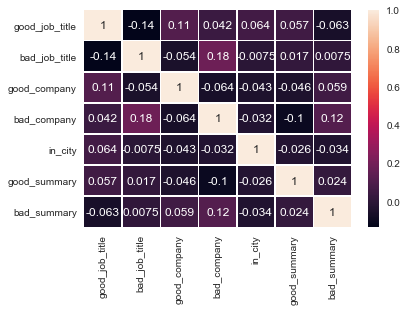

In [100]:
# Perform Pearson correlation coefficients using NumPy and Seaborn
feature_correlation_matrix = sal_X.corr()
#Creating heatmap correlation matrix of predictor coefficients.
sns.set(font_scale=1)
sns.heatmap(feature_correlation_matrix,
           annot = True,
           linewidths = 0.3)
#sns.plt.title('Correlation Heatmap of Eight Binary Variables for Predicting Job Salary')

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sal_X, sal_y, test_size=0.3, stratify=sal_y, random_state=74)

In [102]:
#now score a logistic regression on X_train and y_train using cross_val_scores
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Score:", logreg.score(X_train, y_train))    
scores = cross_val_score(logreg, X_train, y_train, cv=6)
print("Cross-validated scores:", scores)

Score: 0.775147928994
Cross-validated scores: [ 0.79310345  0.75862069  0.71428571  0.75        0.71428571  0.62962963]


In [103]:
# Predicting salaries in X_test given predictors developed with X_train
y_probs = logreg.predict(X_test)   
#generates predicted values of Y_test from X_test based off of training set.
print("Score:", logreg.score(X_test, y_test))
#Create classification and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# printing confusion matrix 
print(confusion_matrix(y_test, y_probs,))
#printing classification report
target_names = ['below_6figs', 'above_6figs']
print(classification_report(y_test, y_probs, target_names=target_names))
y_probs

Score: 0.780821917808
[[ 9 13]
 [ 3 48]]
             precision    recall  f1-score   support

below_6figs       0.75      0.41      0.53        22
above_6figs       0.79      0.94      0.86        51

avg / total       0.78      0.78      0.76        73



array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)